In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [104]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Univariate, Bivariate and Multivariate analysis




**Univariate analysis**

In [7]:
df_churn = data[data["Churn"] == 'Yes']
df_non_churn = data[data["Churn"] == 'No']

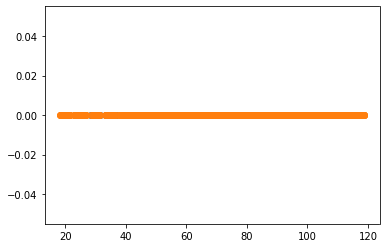

In [15]:
plt.plot(df_churn['MonthlyCharges'],np.zeros_like(df_churn['tenure']),'o')
plt.plot(df_non_churn['MonthlyCharges'],np.zeros_like(df_non_churn['tenure']),'o')

**Bivariate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


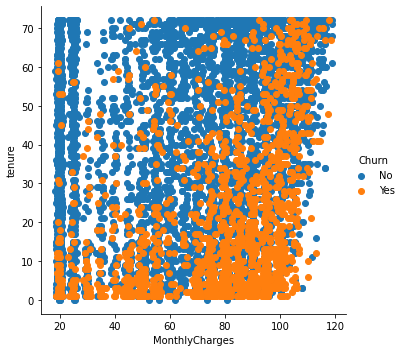

In [14]:
sns.FacetGrid(data,hue="Churn",size=5).map(plt.scatter,"MonthlyCharges","tenure").add_legend();
plt.show()

As we can see from the above images(univariate and bivariate analysis) it will be difficult to use linear classfication techniques like logistic regression to get proper results from the data as the classes(churn and non churn) can't be separated linearly. So we have to go for non-linear classification techniques. In univariate analysis the points are completely overlapped.

**Note:** This is just an observation, to confirm our hypothesis we will also implement logistic regression.

**Multivariate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


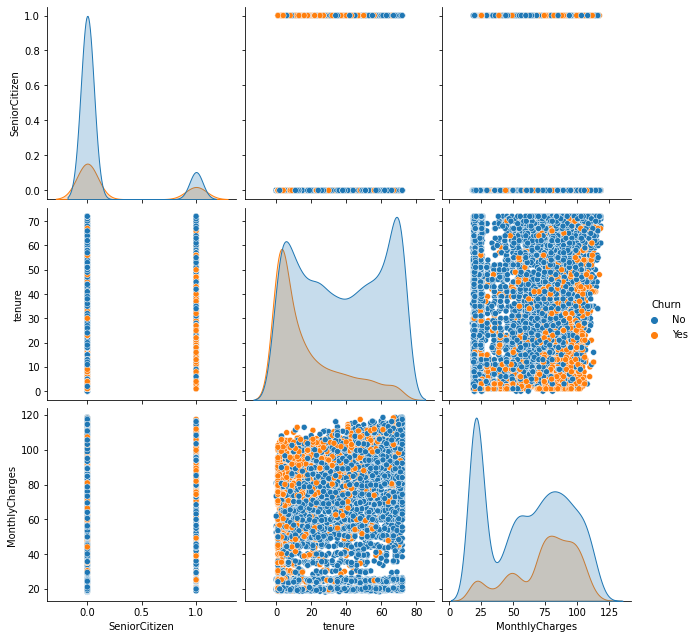

In [17]:
sns.pairplot(data,hue="Churn",size=3)

###Feature Selection Techniques

**Chi squared ---> SelectKBest**

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
x = data.iloc[:,:-1]
y = data['Churn']

In [46]:
x.drop("customerID",axis=1,inplace=True)

In [47]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [48]:
x["gender"] = [1 if i == 'Female' else 0 for i in list(x['gender'])]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [49]:
x["Partner"] = [1 if i == "Yes" else 0 for i in list(x['Partner'])]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,0,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,1,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [50]:
x["Dependents"] = [1 if i == "Yes" else 0 for i in list(x['Dependents'])]

In [51]:
# label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x['PhoneService'] = label_encoder.fit_transform(x['PhoneService'])
x['MultipleLines'] = label_encoder.fit_transform(x['MultipleLines'])
x['InternetService'] = label_encoder.fit_transform(x['InternetService'])
x['OnlineSecurity'] = label_encoder.fit_transform(x['OnlineSecurity'])
x['OnlineBackup'] = label_encoder.fit_transform(x['OnlineBackup'])
x['DeviceProtection'] = label_encoder.fit_transform(x['DeviceProtection'])
x['TechSupport'] = label_encoder.fit_transform(x['TechSupport'])
x['StreamingTV'] = label_encoder.fit_transform(x['StreamingTV'])
x['StreamingMovies'] = label_encoder.fit_transform(x['StreamingMovies'])
x['Contract'] = label_encoder.fit_transform(x['Contract'])
x['PaperlessBilling'] = label_encoder.fit_transform(x['PaperlessBilling'])
x['PaymentMethod'] = label_encoder.fit_transform(x['PaymentMethod'])

In [52]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [77]:
y = [1 if i == "Yes" else 0 for i in list(y)]
y = pd.DataFrame(y, columns=['Churn'])

In [95]:
x['TotalCharges'] = [0 if i == " " else float(i) for i in x['TotalCharges']]

In [96]:
#Apply selectKBest Algorithm
ordered_rank_feautures = SelectKBest(score_func=chi2,k=10)
ordered_feature = ordered_rank_feautures.fit(x,y)

In [97]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [98]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,gender,0.263668
1,SeniorCitizen,134.351545
2,Partner,82.412083
3,Dependents,133.036443
4,tenure,16278.923685
5,PhoneService,0.097261
6,MultipleLines,9.746921
7,InternetService,9.821028
8,OnlineSecurity,551.611529
9,OnlineBackup,230.086520


These are the top features which are very important to find Churn. 

In [99]:
features_rank.nlargest(10,'Score')

,Features,Score
18,TotalCharges,624292.003004
4,tenure,16278.923685
17,MonthlyCharges,3680.787699
14,Contract,1115.780167
8,OnlineSecurity,551.611529
11,TechSupport,523.303866
9,OnlineBackup,230.086520
10,DeviceProtection,191.303140
1,SeniorCitizen,134.351545
3,Dependents,133.036443


**Feature importance using ExtraTreesClassifier**

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [101]:
model.feature_importances_

array([0.03752649, 0.02528442, 0.03089709, 0.02486158, 0.15159062,
       0.00684532, 0.02774201, 0.03601112, 0.05235384, 0.03159344,
       0.03065526, 0.0416217 , 0.02358128, 0.02271398, 0.07713919,
       0.02954205, 0.06323977, 0.13470172, 0.15209914])

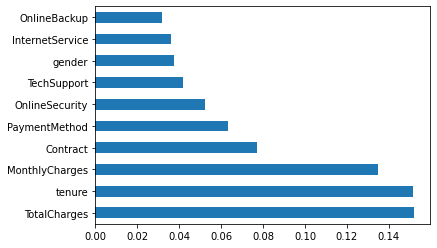

In [102]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

**Correlation**

In [106]:
x.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.006739,0.000863,0.015017,0.012057,-0.000549,0.006825,0.006421,0.008743,-0.000126,0.011754,-0.017352,0.014569,0.000080
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214
MultipleLines,0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577
InternetService,0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755
OnlineSecurity,0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224
OnlineBackup,0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410


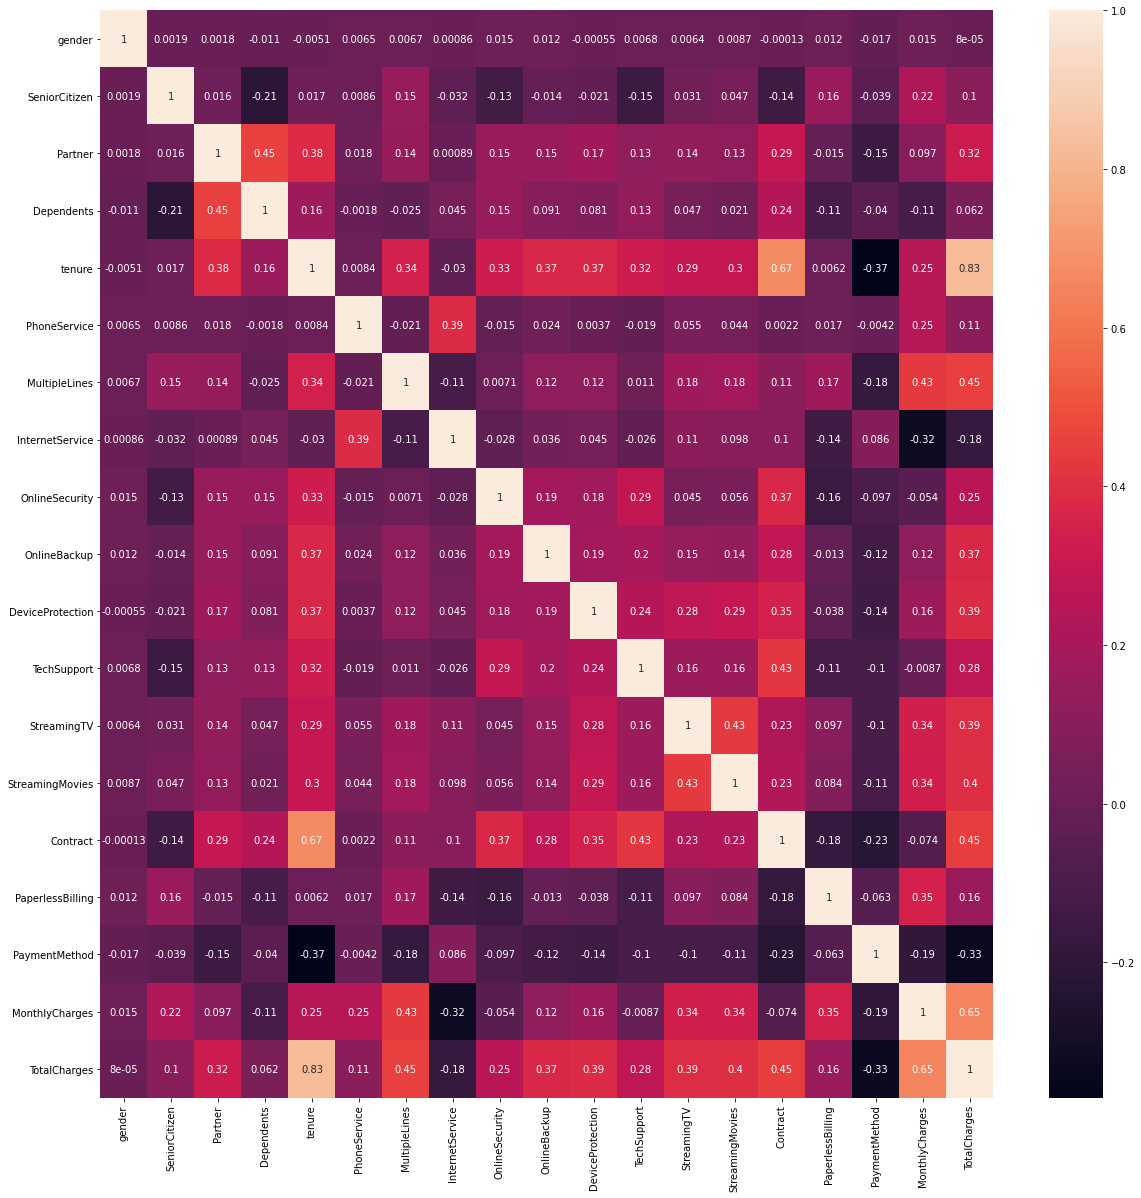

In [108]:
corr = x.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(x[top_features].corr(),annot=True)

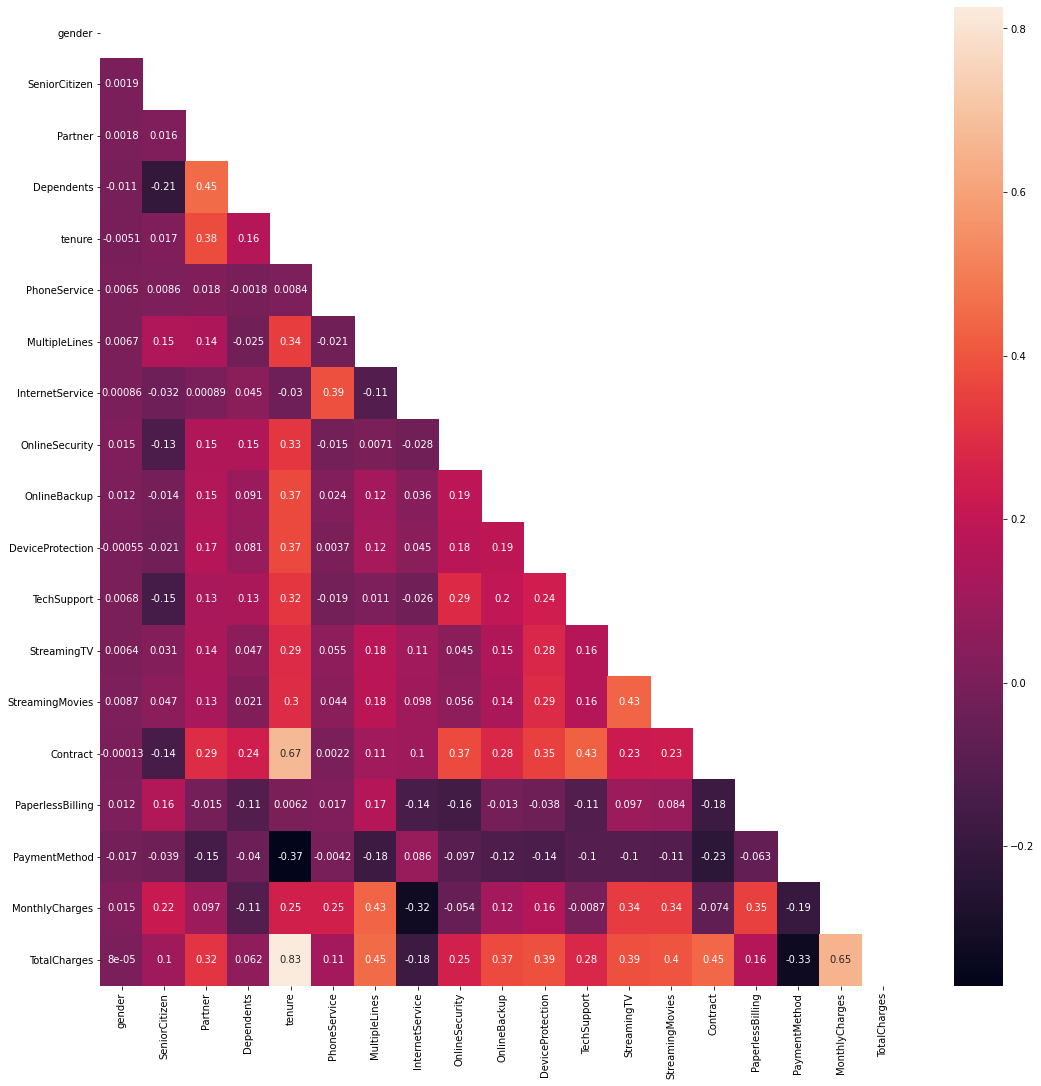

In [111]:
matrix = np.triu(x.corr())
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, mask=matrix)

**Information Gain**

In [112]:
from sklearn.feature_selection import mutual_info_classif

In [113]:
mutual_info=mutual_info_classif(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

Contract            0.098846
tenure              0.071921
TechSupport         0.065860
OnlineSecurity      0.064935
InternetService     0.054852
OnlineBackup        0.052762
PaymentMethod       0.048904
DeviceProtection    0.048193
TotalCharges        0.043808
MonthlyCharges      0.042526
StreamingTV         0.040987
StreamingMovies     0.034914
PaperlessBilling    0.022121
Dependents          0.015759
SeniorCitizen       0.012240
Partner             0.007654
gender              0.006894
PhoneService        0.002213
MultipleLines       0.000000
dtype: float64